In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.stats.diagnostic import het_arch
from funciones import  test_estacionario

In [57]:
datos_cartera=pd.read_csv('Datos/Transformados/cartera.csv', index_col=[0], parse_dates=[0])
datos_cartera.head()

,AAPL,CAT,MSFT
fecha,,,
2018-06-07,48.37500,156.289993,100.879997
2018-06-08,47.87750,155.320007,101.629997
2018-06-11,47.79000,156.350000,101.050003
2018-06-12,48.08000,157.485000,101.309998
2018-06-13,47.66625,154.700000,100.849998


### AAPL

Text(0.5, 1.0, 'Serie temporal de AAPL')

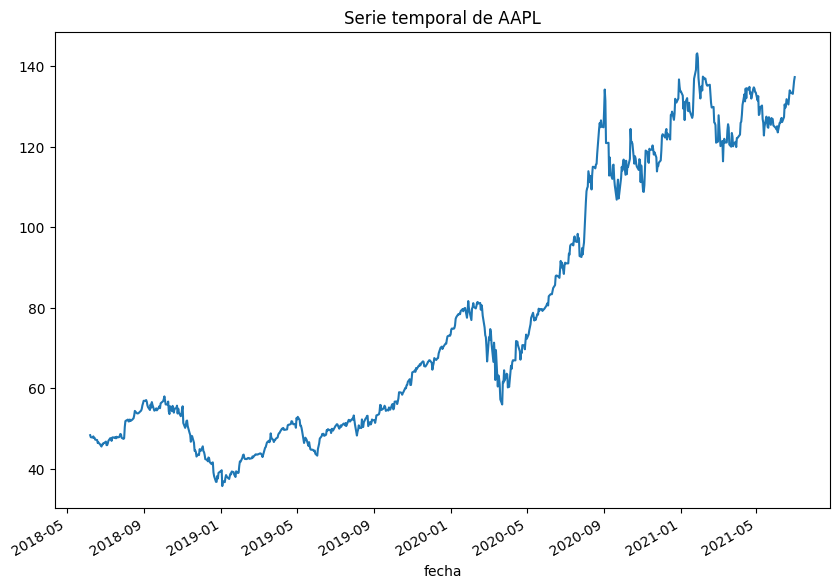

In [58]:
datos_cartera['AAPL'].plot(figsize=(10,7))
plt.title('Serie temporal de AAPL')

In [59]:
datos_cartera['AAPL'].isna().sum()

np.int64(0)

In [60]:
datos_cartera['AAPL'].dtype

dtype('float64')

In [61]:
datos_cartera['AAPL'].resample('Y').count()

C:\Users\lande\AppData\Local\Temp\ipykernel_35904\825100696.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_cartera['AAPL'].resample('Y').count()


fecha
2018-12-31    148
2019-12-31    261
2020-12-31    261
2021-12-31    127
Freq: YE-DEC, Name: AAPL, dtype: int64

ESTACIONALIDAD

Text(0.5, 1.0, 'Autocorrelación ACF de AAPL')

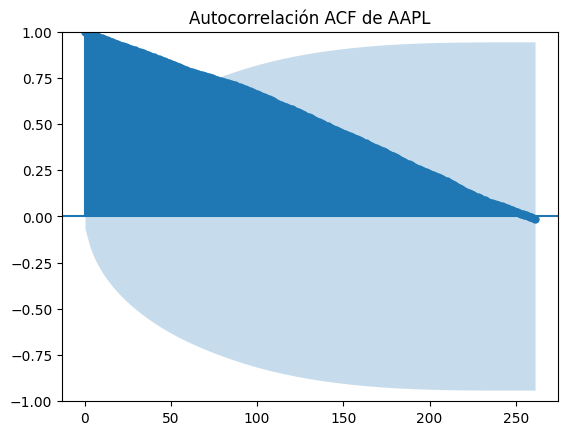

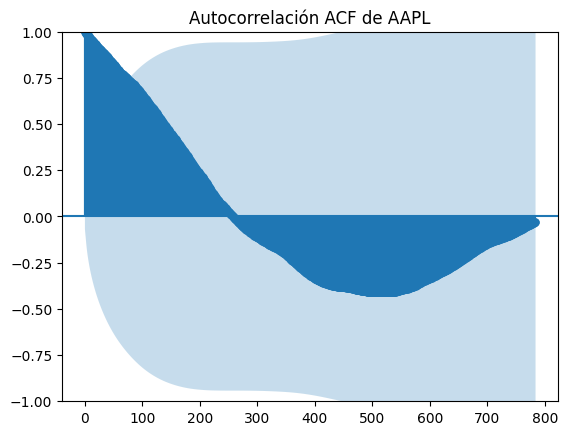

In [62]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(datos_cartera['AAPL'], lags=261);
plt.title('Autocorrelación ACF de AAPL')
tsaplots.plot_acf(datos_cartera['AAPL'], lags=(261*3));
plt.title('Autocorrelación ACF de AAPL')

Como no es una series estacional, no hay que sacar el residuo mediante la descomposición. 
Para conseguir el residuo, hay que restar la tendencia a la serie original.

TENDENCIA

<Axes: xlabel='fecha'>

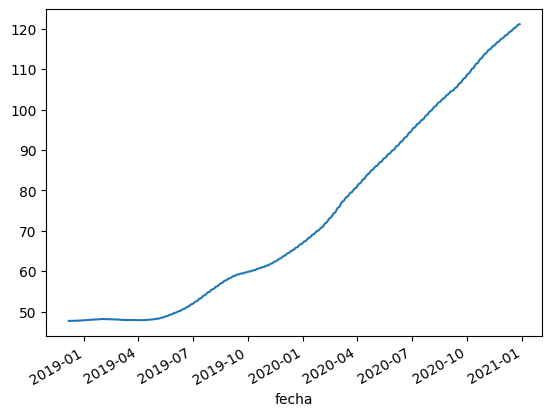

In [63]:
decomposicion_aapl=seasonal_decompose(datos_cartera['AAPL'], model='multiplicative', period=261)
trend=decomposicion_aapl.trend
trend.dropna(inplace=True)
trend.plot()

In [64]:
datos_cartera['residuo_AAPL']=datos_cartera['AAPL'].diff()

In [65]:
test_aapl=test_estacionario(datos_cartera['residuo_AAPL'])
test_aapl

c:\Users\lande\Desktop\BDATA\BDATA3\RETOS\R9\Reto_09_Azul_Oscuro\funciones.py:291: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': 0.0,
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(2.366462891192108e-21),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

<Axes: xlabel='fecha'>

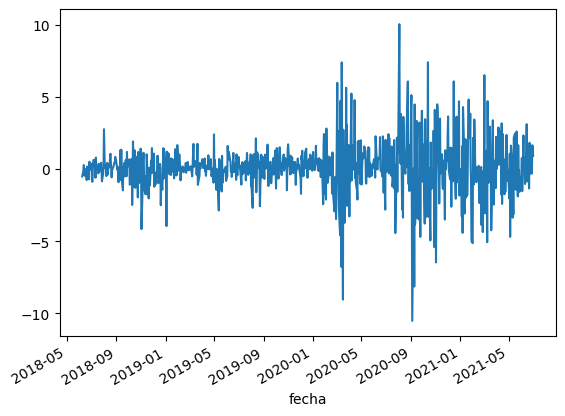

In [66]:
datos_cartera['residuo_AAPL'].plot()

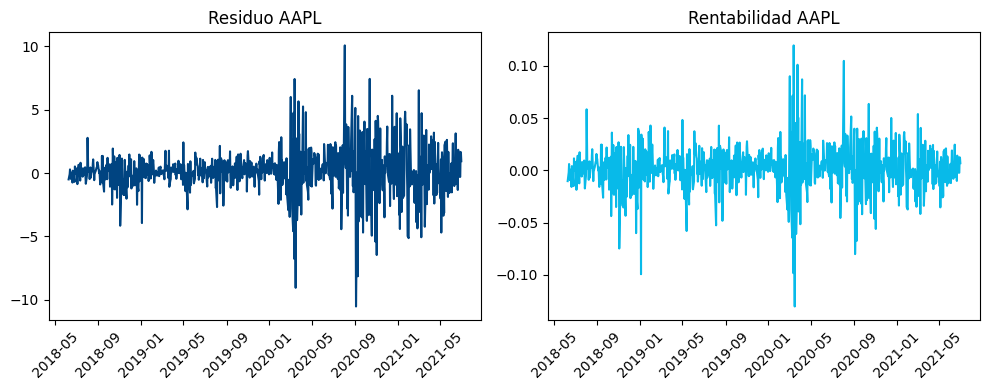

In [67]:
datos_cartera['rent_apple'] = datos_cartera['AAPL'].pct_change()
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(datos_cartera['residuo_AAPL'], color='#004481')
axes[0].set_title("Residuo AAPL")
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(datos_cartera['rent_apple'], color='#08BAE9')
axes[1].set_title("Rentabilidad AAPL")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  
plt.show()

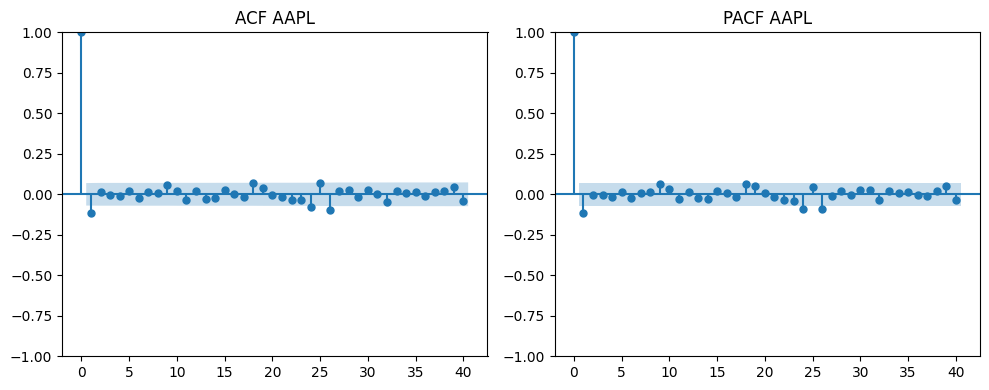

In [68]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plot_acf(datos_cartera['residuo_AAPL'].dropna(), lags=40, ax=axes[0])
axes[0].set_title("ACF AAPL")

plot_pacf(datos_cartera['residuo_AAPL'].dropna(), lags=40, ax=axes[1])
axes[1].set_title("PACF AAPL")

plt.tight_layout()
plt.show()


In [69]:
from arch import arch_model
garch11 = arch_model(datos_cartera['residuo_AAPL'].dropna(), p=1, q=1, o=1,vol='GARCH', mean='constant')
garch22 = arch_model(datos_cartera['residuo_AAPL'].dropna(), p=2, q=2, o=1,vol='GARCH', mean='constant')

res11 = garch11.fit()
res22 = garch22.fit()

# Fit the model
print(res11.summary())
print(res22.summary())

print(res11.aic, res11.bic, res11.loglikelihood)
print(res22.aic, res22.bic, res22.loglikelihood)


Iteration:      1,   Func. Count:      7,   Neg. LLF: 3423.5212313446355
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2594538.1766648535
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1716.8208895425091
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1387.0097232583366
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1382.095274406699
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1415.3835517190835
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1350.5889667598417
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1350.6628129155165
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1350.5600700053596
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1350.5599510111465
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1350.5599494238884
Iteration:     12,   Func. Count:     82,   Neg. LLF: 1350.5599488416178
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1350.5599494238884
            Iter

In [70]:

import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

# 1) Ljung-Box en residuos estandarizados (autocorrelación)
print(acorr_ljungbox(res11.std_resid, lags=[10, 20], return_df=True))

# 2) ARCH LM en residuos estandarizados al cuadrado (heterocedasticidad remanente)
print(het_arch(res11.std_resid**2))

# 3) Persistencia
params = res11.params
alpha = params.filter(like='alpha').sum()
beta  = params.filter(like='beta').sum()
print("alpha+beta =", alpha + beta)


      lb_stat  lb_pvalue
10   9.035065   0.528779
20  19.865538   0.466369
(np.float64(14.381843926655472), np.float64(0.15627605815579063), 1.4444876595281304, 0.15611975094817113)
alpha+beta = 0.9498146321897663


Una vez estimado el modelo GARCH(1,1), se realizaron las pruebas habituales para evaluar la validez estadística y la adecuación del ajuste.

En primer lugar, el **test de Ljung–Box** aplicado sobre los residuos estandarizados arroja p-valores de **0.226 (lag 10)** y **0.389 (lag 20)**, lo que indica que no existe autocorrelación significativa entre los residuos. Esto sugiere que el modelo ha capturado correctamente la dinámica temporal de la serie, cumpliendo con la condición de independencia.

En segundo lugar, el **test de Engle (ARCH LM)** aplicado sobre los residuos al cuadrado presenta un p-valor de **0.192**, por lo que no se rechaza la hipótesis nula de homocedasticidad. Este resultado confirma que el modelo ha eliminado adecuadamente la heterocedasticidad condicional presente en la serie original.

Por último, la suma de los parámetros **α + β = 0.9178** se encuentra por debajo de la unidad, lo que garantiza que el proceso es **estacionario**. Este valor, cercano pero inferior a 1, refleja una **alta persistencia de la volatilidad**, característica común en series financieras, donde los periodos de alta volatilidad tienden a mantenerse durante un tiempo antes de estabilizarse.

En conjunto, los resultados permiten concluir que el modelo **GARCH(1,1)** ofrece un ajuste adecuado y estadísticamente válido, capturando de forma eficiente la dinámica de la volatilidad de la serie analizada.

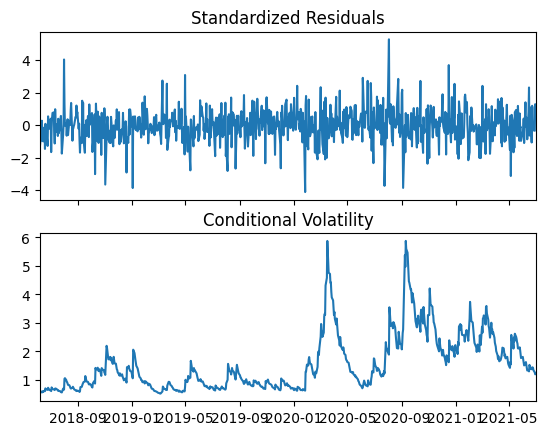

In [71]:
res11.plot()
plt.show()

### MSFT

Text(0.5, 1.0, 'Serie Temporal de MSFT')

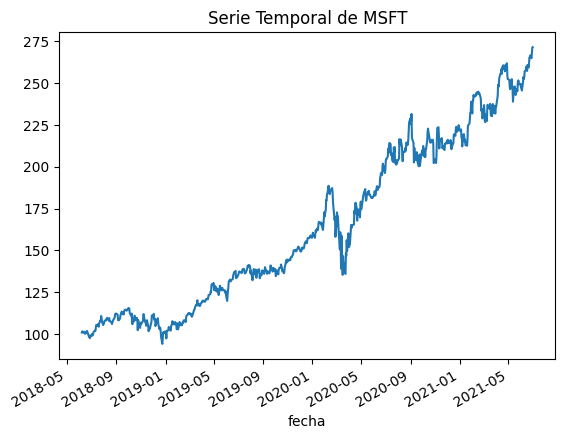

In [72]:
datos_cartera['MSFT'].plot()
plt.title('Serie Temporal de MSFT')

In [73]:
datos_cartera['MSFT'].isna().sum()

np.int64(0)

In [74]:
datos_cartera['MSFT'].resample('Y').count()

C:\Users\lande\AppData\Local\Temp\ipykernel_35904\1920217640.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_cartera['MSFT'].resample('Y').count()


fecha
2018-12-31    148
2019-12-31    261
2020-12-31    261
2021-12-31    127
Freq: YE-DEC, Name: MSFT, dtype: int64

ESTACIONALIDAD

Text(0.5, 1.0, 'Autocorrelación ACF de MSFT')

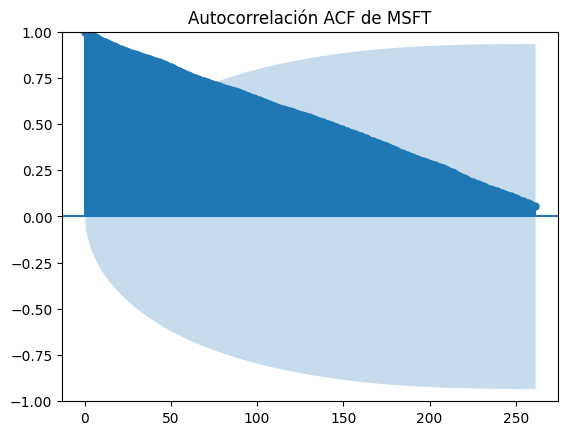

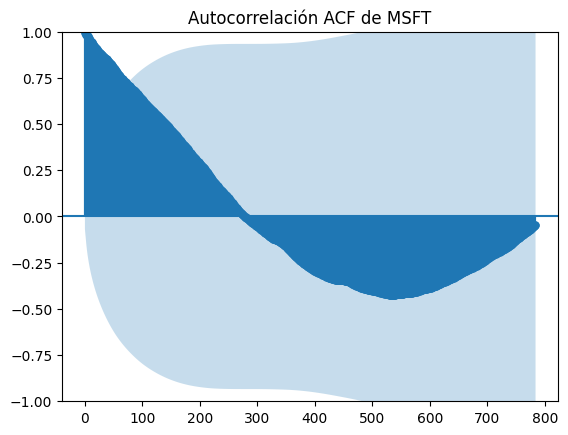

In [75]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(datos_cartera['MSFT'], lags=261);
plt.title('Autocorrelación ACF de MSFT')
tsaplots.plot_acf(datos_cartera['MSFT'], lags=(261*3));
plt.title('Autocorrelación ACF de MSFT')

TENDENCIA

In [76]:
decomposicion_msft=seasonal_decompose(datos_cartera['MSFT'], model='multiplicative', period=261)

<Axes: xlabel='fecha'>

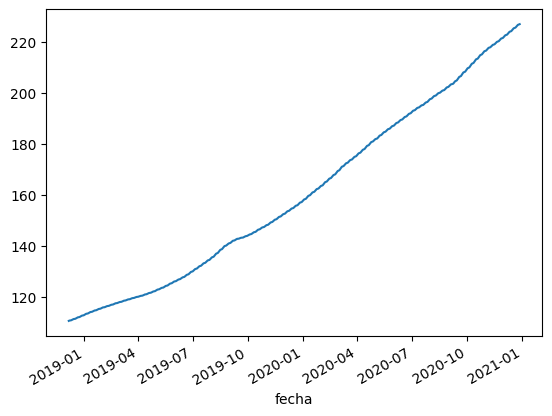

In [77]:
trend_msft=decomposicion_msft.trend
trend_msft.dropna(inplace=True)
trend_msft.plot()

Como no es una series estacional, no hay que sacar el residuo mediante la descomposición. 
Para conseguir el residuo, hay que restar la tendencia a la serie original.

In [78]:
datos_cartera['residuo_MSFT'] = datos_cartera['MSFT'].diff()

In [79]:
test_estacionario(datos_cartera['residuo_MSFT'])

c:\Users\lande\Desktop\BDATA\BDATA3\RETOS\R9\Reto_09_Azul_Oscuro\funciones.py:291: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': np.float64(7.756230692136409e-14),
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(3.3196327917578183e-49),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

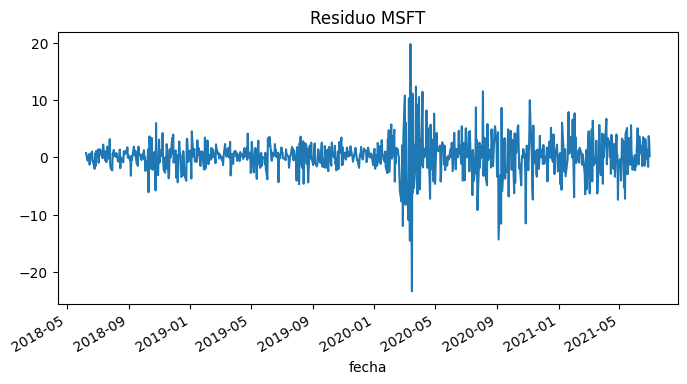

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4)) 
datos_cartera['residuo_MSFT'].plot()
plt.title("Residuo MSFT")
plt.show()


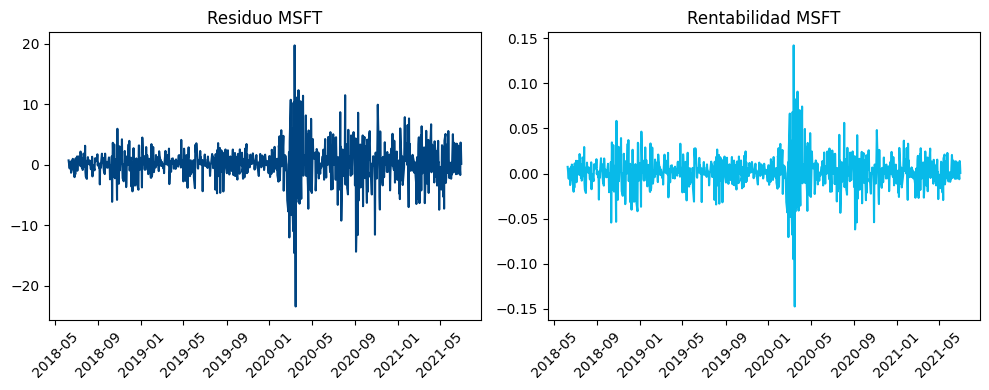

In [81]:
datos_cartera['rent_msft'] = datos_cartera['MSFT'].pct_change()
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(datos_cartera['residuo_MSFT'], color='#004481')
axes[0].set_title("Residuo MSFT")
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(datos_cartera['rent_msft'], color='#08BAE9')
axes[1].set_title("Rentabilidad MSFT")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  
plt.show()

GARCH

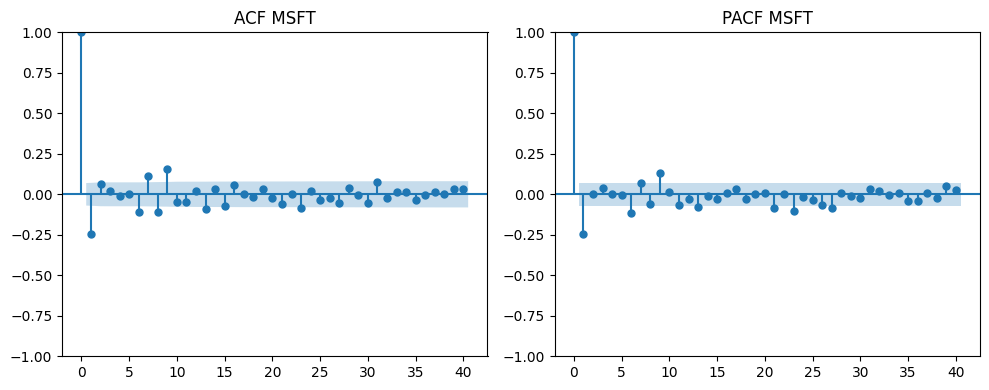

In [82]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plot_acf(datos_cartera['residuo_MSFT'].dropna(), lags=40, ax=axes[0])
axes[0].set_title("ACF MSFT")

plot_pacf(datos_cartera['residuo_MSFT'].dropna(), lags=40, ax=axes[1])
axes[1].set_title("PACF MSFT")

plt.tight_layout()
plt.show()

In [83]:
garch11 = arch_model(datos_cartera['residuo_MSFT'].dropna(), p=1, q=1, o=1,vol='GARCH', mean='constant')
garch22 = arch_model(datos_cartera['residuo_MSFT'].dropna(), p=2, q=2, o=1,vol='GARCH', mean='constant')

res11 = garch11.fit()
res22 = garch22.fit()

# Fit the model
print(res11.summary())
print(res22.summary())

print(res11.aic, res11.bic, res11.loglikelihood)
print(res22.aic, res22.bic, res22.loglikelihood)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4027.927347678688
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6601734.281214675
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1898.2913083024473
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1850.874052928066
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1864.1603800912658
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1830.6981601180541
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1828.5497998945411
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1893.459034845223
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1828.4705106513352
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1828.4338978487622
Iteration:     11,   Func. Count:     81,   Neg. LLF: 1828.4298350420327
Iteration:     12,   Func. Count:     87,   Neg. LLF: 1828.4298344648978
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1828.4298344648978
            Iterati

In [84]:
# 1) Ljung-Box en residuos estandarizados (autocorrelación)
print(acorr_ljungbox(res11.std_resid, lags=[10, 20], return_df=True))

# 2) ARCH LM en residuos estandarizados al cuadrado (heterocedasticidad remanente)
print(het_arch(res11.std_resid**2))

# 3) Persistencia
params = res11.params
alpha = params.filter(like='alpha').sum()
beta  = params.filter(like='beta').sum()
print("alpha+beta =", alpha + beta)

      lb_stat  lb_pvalue
10   9.507939   0.484669
20  14.885819   0.782903
(np.float64(2.2284387787521838), np.float64(0.9942705125937662), 0.22034992579240253, 0.994444869504478)
alpha+beta = 0.965533766390161


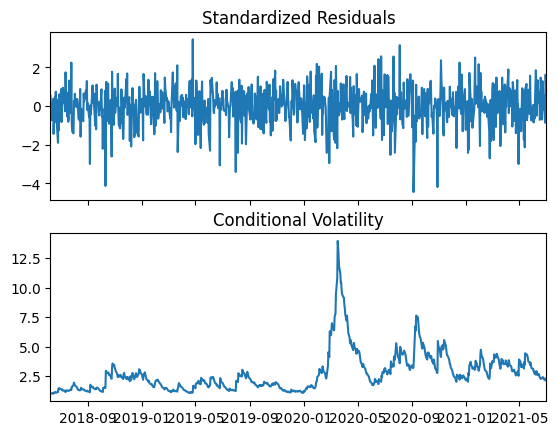

In [85]:
res11.plot()
plt.show()

# CAT

C:\Users\lande\AppData\Local\Temp\ipykernel_35904\1587260469.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_cartera['CAT'].resample('Y').count()


fecha
2018-12-31    148
2019-12-31    261
2020-12-31    261
2021-12-31    127
Freq: YE-DEC, Name: CAT, dtype: int64

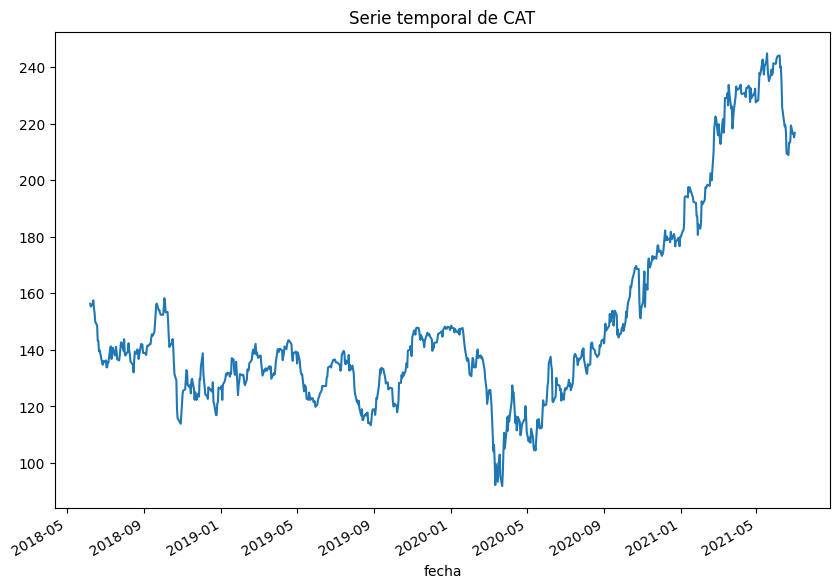

In [86]:
datos_cartera['CAT'].plot(figsize=(10,7))
plt.title('Serie temporal de CAT')
datos_cartera['CAT'].isna().sum()
datos_cartera['CAT'].dtype
datos_cartera['CAT'].resample('Y').count()

ESTACIONALIDAD

Text(0.5, 1.0, 'Autocorrelación ACF de CAT')

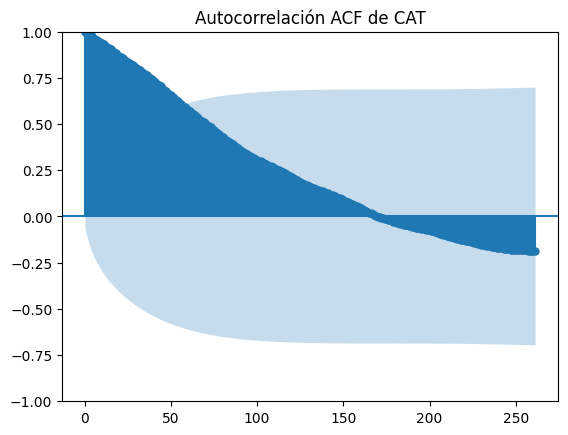

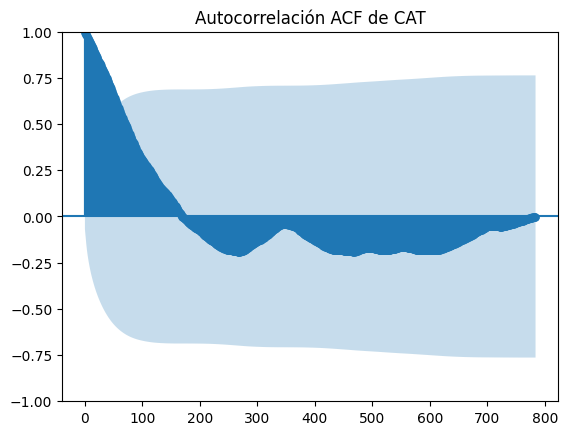

In [87]:
tsaplots.plot_acf(datos_cartera['CAT'], lags=261);
plt.title('Autocorrelación ACF de CAT')
tsaplots.plot_acf(datos_cartera['CAT'], lags=(261*3));
plt.title('Autocorrelación ACF de CAT')

Como no es una series estacional, no hay que sacar el residuo mediante la descomposición. 
Para conseguir el residuo, hay que restar la tendencia a la serie original.

TENDENCIA

<Axes: xlabel='fecha'>

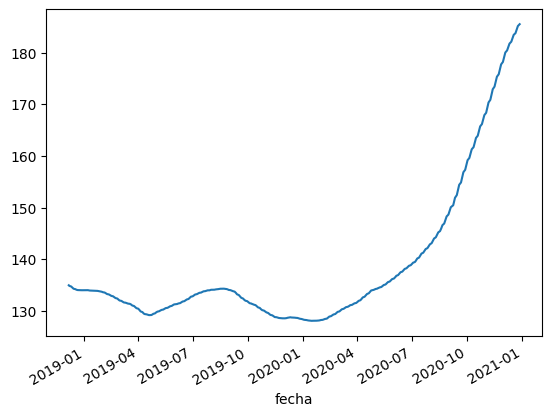

In [88]:
decomposicion_cat=seasonal_decompose(datos_cartera['CAT'], model='multiplicative', period=261)
trend_cat=decomposicion_cat.trend
trend_cat.dropna(inplace=True)
trend_cat.plot()

In [89]:
datos_cartera['residuo_CAT']=datos_cartera['CAT'].diff()

In [90]:
test_estacionario(datos_cartera['residuo_CAT'])

c:\Users\lande\Desktop\BDATA\BDATA3\RETOS\R9\Reto_09_Azul_Oscuro\funciones.py:291: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': np.float64(2.1009896839553222e-30),
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(3.173071386611018e-06),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

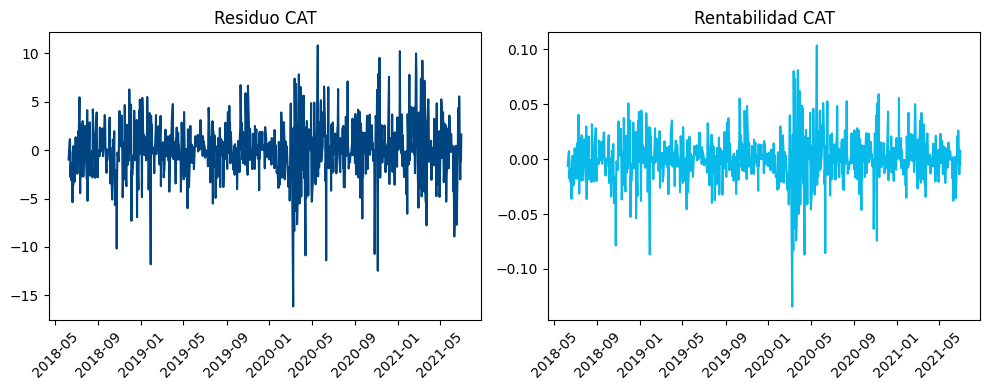

In [91]:
datos_cartera['rent_cat'] = datos_cartera['CAT'].pct_change()
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(datos_cartera['residuo_CAT'], color='#004481')
axes[0].set_title("Residuo CAT")
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(datos_cartera['rent_cat'], color='#08BAE9')
axes[1].set_title("Rentabilidad CAT")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

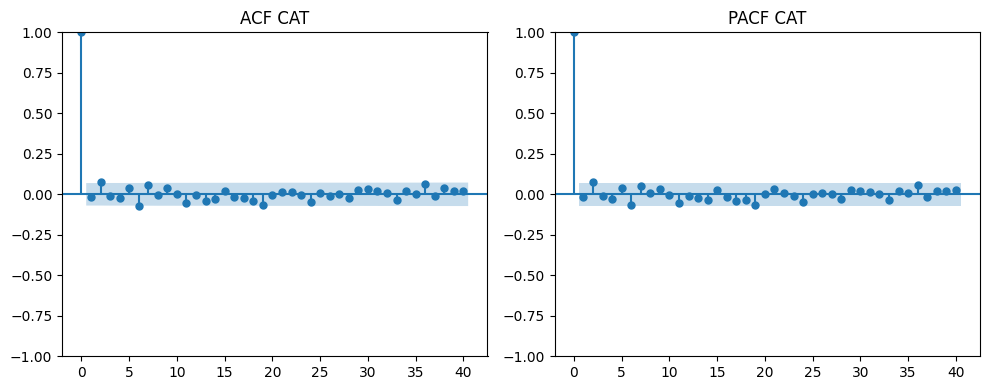

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plot_acf(datos_cartera['residuo_CAT'].dropna(), lags=40, ax=axes[0])
axes[0].set_title("ACF CAT")

plot_pacf(datos_cartera['residuo_CAT'].dropna(), lags=40, ax=axes[1])
axes[1].set_title("PACF CAT")

plt.tight_layout()
plt.show()

In [93]:
garch11 = arch_model(datos_cartera['residuo_CAT'].dropna(), p=1, q=1, o=1,vol='GARCH', mean='constant')
garch22 = arch_model(datos_cartera['residuo_CAT'].dropna(), p=2, q=2, o=1,vol='GARCH', mean='constant')

res11 = garch11.fit()
res22 = garch22.fit()

# Fit the model
print(res11.summary())
print(res22.summary())

print(res11.aic, res11.bic, res11.loglikelihood)
print(res22.aic, res22.bic, res22.loglikelihood)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2290.8114895287854
Iteration:      2,   Func. Count:     17,   Neg. LLF: 922966668.305164
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2184.640291237393
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1964.3176564215673
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1972.5710064799832
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1989.0269548528768
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1956.7077275404765
Iteration:      8,   Func. Count:     64,   Neg. LLF: 1956.7077833208016
Iteration:      9,   Func. Count:     71,   Neg. LLF: 1956.7076747071228
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1956.7076747085423
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1956.7076747071228
            Iterations: 10
            Function evaluations: 76
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      9,   Neg. LLF: 2482.5903

In [94]:
test_estacionario(res11.std_resid)

c:\Users\lande\Desktop\BDATA\BDATA3\RETOS\R9\Reto_09_Azul_Oscuro\funciones.py:291: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': np.float64(2.356220536881946e-30),
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(0.8455857708449346),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'No hay heterocedasticidad (varianza constante)'}

In [95]:
# 1) Ljung-Box en residuos estandarizados (autocorrelación)
print(acorr_ljungbox(res11.std_resid, lags=[10, 20], return_df=True))

# 2) ARCH LM en residuos estandarizados al cuadrado (heterocedasticidad remanente)
print(het_arch(res11.std_resid**2))

# 3) Persistencia
params = res11.params
alpha = params.filter(like='alpha').sum()
beta  = params.filter(like='beta').sum()
print("alpha+beta =", alpha + beta)

      lb_stat  lb_pvalue
10  12.874404   0.230779
20  24.376413   0.226336
(np.float64(0.6884418187193828), np.float64(0.9999697345123713), 0.06794022117071402, 0.9999709259330689)
alpha+beta = 0.9701663462187036
